# Lab One: Visualization and Data Preprocessing
### Ryan Bass, Brett Benefield, Cho Kim, Nicole Wittlin

### Business Understanding

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific. CHUNK TO BE DELETED AFTER SECTION IS COMPLETE

The team selected data from the Belk Endowment Educational Attainment Data for North Carolina Public Schools, which contains the North Carolina Public Schools Report Card as well as the Statistical Profiles Databases. This data was compiled by Dr. Jake Drew from original sources provided by the Public Schools of North Carolina (http://ncpublicschools.org), and the compilation, research, and analysis of the educational attainment data was funded by the John M. Belk Endowment (JMBE).

JMBE’s mission is focused on postsecondary education in North Carolina to help underrepresented students access and complete postsecondary education and leave workforce ready. The educational attainment data set contains comprehensive statistics, demographics, and achievement metrics about North Carolina public, charter, and alternative elementary, middle, and high schools. This wealth of data is the foundation for research to help JMBE understand trends and improve postsecondary pathways in the state.

Our team has selected a subset from the larger educational attainment data to explore the relationship between enrollment in postsecondary education within 18-24 months of high school graduation and teacher metrics related to REPLACE WITH PERSONNEL STATS {X, Y, Z}. This is important to help identify both positive and negative factors influencing students’ enrollment decisions and understand how educators can impact the pipeline to higher education.

The effectiveness of a model can be measured by how precisely the prediction algorithm can predict the percentage of students enrolled in a postsecondary education institution. NEED MORE SPECIFIC DETAILS HERE

 
#### Define and Measure outcomes:


### Data Meaning Type
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

#### College Enrollment

| Column Name          | Description                                                                                                                                                                                                                                                                                                                                                                                             | Type       |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| Graduation_year      | Year students graduated from high school                                                                                                                                                                                                                                                                                                                                                                | Nominal    |
| Unit_code            | Code to identify School/LEAState. "Unit codes belonging to individual schools may be mapped to a given district using the first 3 characters of the unit code. For example, schools belonging to the district "995LEA" will each have unit code that begins with "995.""                                                                                                                                | Nominal    |
| leaname              | LEA (Local Education Agency) Name. LEA is a commonly used acronym for a school district.                                                                                                                                                                                                                                                                                                                | Nominal    |
| schname              | School Name                                                                                                                                                                                                                                                                                                                                                                                             | Nominal    |
| status               | The postsecondary enrollment action as defined in the US Department of Education C160 EDEN (Education Data Exchange Network) specification.<br> <table><tr><td>ENROLL</td><td>Enrolled in an IHE within 16 months of receiving a regular high school diploma.</td></tr> <tr><td>NOENROLL</td><td>Did not enroll in an IHE within 16 months of receiving a regular high school diploma</td></tr></table> | Nominal    |
| subgroup             | A subset of the total population that shares a common characteristic, like sex or race.<table><tr><td>EDS</td><td>Economically Disadvantaged</td></tr><tr><td>NOT_EDS</td><td>Not Economically Disadvantaged</td></tr><tr><td>LEP</td><td>Limited English Proficiency</td></tr><tr><td>SWD</td><td>Students With Disabilities</td></tr><tr><td>WHTE</td><td>White</td></tr><tr><td>BLCK</td><td>Black</td></tr><tr><td>HISP</td><td>Hispanic</td></tr><tr><td>AMIN</td><td>American Indian</td></tr><tr><td>ASIA</td><td>Asian</td></tr><tr><td>MULT</td><td>Two or More Races</td></tr><tr><td>MALE</td><td>Male</td></tr><tr><td>FEM</td><td>Female</td></tr><tr><td>ALL</td><td>All Students</td></tr><tr><td>AIG</td><td>Academically/Intellectually Gifted</td></tr><tr><td>PACI</td><td>Pacific Islander</td></tr></table>| Nominal    |
| Subgroup_name        | Full description of the subgroup                                                                                                                                                                                                                                                                                                                                                                        | Nominal    |
| schcount             | Count of students by subgroup and status (ENROLL, NOENROLL) within a school with masking applied.                                                                                                                                                                                                                                                                                                       | Continuous |
| leacount             | Count of students by subgroup and status (ENROLL, NOENROLL) within a LEA/Charter with masking applied.                                                                                                                                                                                                                                                                                                  | Continuous |
| seacount             | Count of students by subgroup and status (ENROLL, NOENROLL) within the State (SEA - State Educational Agency).                                                                                                                                                                                                                                                                                                                     | Continuous |
| sch_percent_enrolled | The percentage of enrolled students among total students (ENROLL Count/ TOTAL Count) within a school with masking applied                                                                                                                                                                                                                                                                               | Ordinal    |
| lea_percent_enrolled | The percentage of enrolled students among total students (ENROLL Count/ TOTAL Count) within a LEA/Charter with masking applied.                                                                                                                                                                                                                                                                         | Ordinal    |
| sea_percent_enrolled | The percentage of enrolled students among total students (ENROLL Count/ Total Count) within the State (SEA).                                                                                                                                                                                                                                                                                            | Ordinal    |

#### Personnel
| Column Name                    | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | Type    |
|--------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------|
| Year                           | School Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | Nominal |
| Unit_code                      | Code to identify School/LEA/State                                                                                                                                                                                                                                                                                                                                                                                                                                              | Nominal |
| Lea_Name                       | LEA Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | Nominal |
| State_Name                     | State Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | Nominal |
| Category_cd                    | Category code<br> <table><tr><td>E</td><td>School has elementary schools grades (PK-5)</td></tr> <tr><td>M</td><td>School has middle school grades (6-8)</td></tr> <tr><td>H</td><td>School has high school grades (9-13)</td></tr> <tr><td>I</td><td>School has elementary and middle school grades</td></tr> <tr><td>T</td><td>School has middle and high school grades</td></tr> <tr><td>A</td><td>School has elementary, middle, and high school grades</td></tr> </table> | Nominal |
| Prin_advance_dgr_pct           | Percent of principals with advanced degrees at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                       |         |
| St_Prin_advance_dgr_pct        | Percent of principals with advanced degrees at state level                                                                                                                                                                                                                                                                                                                                                                                                                     |         |
| _1yr_prin_trnovr_pct           | One year principal turnover rate at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                  |         |
| St_1yr_prin_trnovr_pct         | One year principal turnover rate at state level                                                                                                                                                                                                                                                                                                                                                                                                                                |         |
| Prin_male_pct                  | Percent of male principals at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                        |         |
| St_Prin_male_pct               | Percent of male principals at state level                                                                                                                                                                                                                                                                                                                                                                                                                                      |         |
| Prin_female_pct                | Percent of female principals at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                      |         |
| St_prin_female_pct             | Percent of female principals at state level                                                                                                                                                                                                                                                                                                                                                                                                                                    |         |
| Prin_black_pct                 | Percent of black principals at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                       |         |
| St_Prin_black_pct              | Percent of black principals at state level                                                                                                                                                                                                                                                                                                                                                                                                                                     |         |
| Prin_white_pct                 | Percent of white principals at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                       |         |
| St_Prin_white_pct              | Percent of white principals at state level                                                                                                                                                                                                                                                                                                                                                                                                                                     |         |
| Prin_other_pct                 | Percent of principals of other races including Indian, Asian, Hispanic and Pacific-islander at LEA level                                                                                                                                                                                                                                                                                                                                                                       |         |
| St_Prin_other_pct              | Percent of principals of other races including Indian, Asian, Hispanic and Pacific-islander at state level                                                                                                                                                                                                                                                                                                                                                                     |         |
| Flicensed_teach_pct            | Percent of teachers that meet NC fully licensed definition at school level                                                                                                                                                                                                                                                                                                                                                                                                     |         |
| Lea_flicensed_teach_pct        | Average Percent of Teachers that meet NC fully licensed definition at LEA level                                                                                                                                                                                                                                                                                                                                                                                                |         |
| St_flicensed_teach_pct         | Average Percent of Teachers that meet NC fully licensed definition at state level                                                                                                                                                                                                                                                                                                                                                                                              |         |
| Class_teach_num                | Average number of classroom teachers at School Level                                                                                                                                                                                                                                                                                                                                                                                                                           |         |
| Lea_class_teach_num            | Average number of classroom teachers at LEA Level                                                                                                                                                                                                                                                                                                                                                                                                                              |         |
| St_class_teach_num             | Average number of classroom teachers at State Level                                                                                                                                                                                                                                                                                                                                                                                                                            |         |
| nbpts_num                      | Number of National Board Certified staff at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                          |         |
| Lea_nbpts_num                  | Average number of National Board Certified staff at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                  |         |
| St_nbpts_num                   | Average number of National Board Certified staff at state level                                                                                                                                                                                                                                                                                                                                                                                                                |         |
| advance_dgr_pct                | Percent of teachers with masters or higher degree at school level                                                                                                                                                                                                                                                                                                                                                                                                              |         |
| Lea_advance_dgr_pct            | Average percent of teachers with masters or higher degree at LEA level                                                                                                                                                                                                                                                                                                                                                                                                         |         |
| St_advance_dgr_pct             | Average percent of teachers with masters or higher degree at state level                                                                                                                                                                                                                                                                                                                                                                                                       |         |
| _1yr_tchr_trnovr_pct           | One Year Teacher turnover percentage at school level                                                                                                                                                                                                                                                                                                                                                                                                                           |         |
| Lea_1yr_tchr_trnovr_pct        | One Year Teacher turnover percentage at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                              |         |
| St_1yr_tchr_trnovr_pct         | One Year Teacher turnover percentage at state level                                                                                                                                                                                                                                                                                                                                                                                                                            |         |
| Lateral_teach_pct              | lateral entry teacher percentage at school level                                                                                                                                                                                                                                                                                                                                                                                                                               |         |
| Lea_lateral_teach_pct          | Average lateral entry teacher percentage at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                          |         |
| St_lateral_teach_pct           | Average lateral entry teacher percentage at state level                                                                                                                                                                                                                                                                                                                                                                                                                        |         |
| Highqual_class_pct             | Percent of highly qualified classes at school level                                                                                                                                                                                                                                                                                                                                                                                                                            |         |
| Lea_highqual_class_pct         | Average highly qualified classes at LEA level                                                                                                                                                                                                                                                                                                                                                                                                                                  |         |
| St_highqual_class_pct          | Average highly qualified classes at state level                                                                                                                                                                                                                                                                                                                                                                                                                                |         |
| Lea_highqual_class_hp_pct      | Percent of classes taught by highly qualified teachers in high poverty schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                    |         |
| St_highqual_class_hp_pct       | Percent of classes taught by highly qualified teachers in high poverty schools at state level                                                                                                                                                                                                                                                                                                                                                                                  |         |
| Lea_highqual_class_lp_pct      | Percent of classes taught by highly qualified teachers in low poverty schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                     |         |
| St_highqual_class_lp_pct       | Percent of classes taught by highly qualified teachers in low poverty school at state level                                                                                                                                                                                                                                                                                                                                                                                    |         |
| Lea_highqual_class_all_pct     | Percent of classes taught by highly qualified teachers in all schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                             |         |
| St_highqual_class_all_pct      | Percent of classes taught by highly qualified teachers in all schools at state level                                                                                                                                                                                                                                                                                                                                                                                           |         |
| Lea_not_highqual_class_hp_pct  | Percent of classes taught by not highly qualified teachers in high poverty schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                |         |
| St_not_highqual_class_hp_pct   | Percent of classes taught by not highly qualified teachers in high poverty schools at state level                                                                                                                                                                                                                                                                                                                                                                              |         |
| Lea_not_highqual_class_lp_pct  | Percent of classes taught by not highly qualified teachers in low poverty schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                 |         |
| St_not_highqual_class_lp_pct   | Percent of classes taught by not highly qualifed teachers in low poverty schools at state level                                                                                                                                                                                                                                                                                                                                                                                |         |
| Lea_not_highqual_class_all_pct | Percent of classes taught by not highly qualified teachers in all schools at LEA level                                                                                                                                                                                                                                                                                                                                                                                         |         |
| St_not_highqual_class_all_pct  | Percent of classes taught by not highly qualified teachers in all schools at state level                                                                                                                                                                                                                                                                                                                                                                                       |         |
| Total_class_tch_num            | Number of classroom teachers                                                                                                                                                                                                                                                                                                                                                                                                                                                   |         |
| Total_nbpts_num                | Number of National Board Certified teachers                                                                                                                                                                                                                                                                                                                                                                                                                                    |         |

### Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

### Simple Statistics
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics are meaningful.

### Visualize Attributes
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate. 

### Explore Joint Attributes
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

### Explore Attributes and Class
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In [3]:
# https://stackoverflow.com/questions/38918653/pandas-invalid-literal-for-long-with-base-10-error
# https://stackoverflow.com/questions/15325182/how-to-filter-rows-in-pandas-by-regex

In [4]:
%matplotlib inline

In [30]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import HTML, display

In [31]:
%cd "C:\sandbox\SMU\dataMining\7331DataMining\EducationDataNC\2017\Raw Datasets"
dfCollege = pd.read_csv("college-enrollment.csv")
dfTeachers = pd.read_csv("personnel.csv")

C:\sandbox\SMU\dataMining\7331DataMining\EducationDataNC\2017\Raw Datasets


In [32]:
# Create a list of columns that are a specific data type
nominal = ['graduation_year', 'unit_code', 'leaname', 'schname', 'status', 'subgroup', 'subgroup_name']
continuous = ['schcount', 'leacount', 'seacount']
ordinal = ['sch_percent_enrolled', 'lea_percent_enrolled', 'sea_percent_enrolled']

# Convert data to correct data type
dfCollege[nominal] = dfCollege[nominal].astype(object)
dfCollege[continuous] = dfCollege[continuous].astype(float)
dfCollege[ordinal] = dfCollege[ordinal].astype(float)

In [34]:
colnames = {'graduation_year': 'Graduation Year', 
            'unit_code': 'School/District/State ID', 
            'leaname': 'District', 
            'schname': 'School', 
            'status': 'College Enrollment',
            'subgroup': 'Subgroup',
            'subgroup_name': 'Subgroup Name',
            'schcount': 'School Count',
            'leacount': 'District Count',
            'seacount': 'State Count',
            'sch_percent_enrolled': '% School Enrolled',
            'lea_percent_enrolled': '% District Enrolled',
            'sea_percent_enrolled': '% State Enrolled'
           }

dfCollege.rename(columns=colnames, inplace=True)

In [39]:
# Only look at the overall total of students that enrolled in college
# The dataset further divides it based on various categories which we can explore later
dfCollegeAll = dfCollege[(dfCollege['Subgroup'] == "ALL") & (dfCollege['College Enrollment'] == "ENROLL")]

# Remove schools identified by LEA and SEA unit_codes
# Not sure why this grouping of schools is treated as an invidual school (warrants further investigation)
dfCollegeAll = dfCollegeAll[~dfCollegeAll['School/District/State ID'].str.contains('LEA|SEA')]

# Remove schools that didn't report number of students enrolled in college courses (warrents further investigation)
dfCollegeAll = dfCollegeAll[~dfCollegeAll['School Count'].isna()]
dfCollegeAll = dfCollegeAll[~dfCollegeAll['District Count'].isna()]

#### Basic column statistics

In [43]:
dfCollegeAll.describe()

,School Count,District Count,State Count,% School Enrolled,% District Enrolled,% State Enrolled
count,489.000000,489.000000,489.0,489.000000,489.000000,4.890000e+02
mean,102.321063,1148.576687,51362.0,51.284009,51.023298,5.198846e+01
std,80.984473,1486.836354,0.0,12.385215,6.873512,1.778176e-13
min,5.000000,18.000000,51362.0,13.157895,31.428571,5.198846e+01
25%,38.000000,252.000000,51362.0,43.750000,48.443157,5.198846e+01
50%,87.000000,644.000000,51362.0,52.325581,51.403721,5.198846e+01
75%,140.000000,1178.000000,51362.0,59.200000,54.686947,5.198846e+01
max,423.000000,5844.000000,51362.0,89.583333,67.379679,5.198846e+01


#### Identify outliers

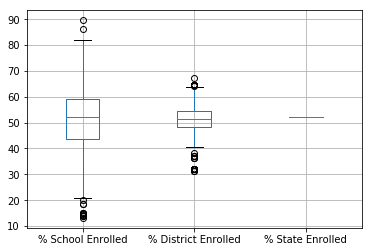

In [44]:
dfCollegeAll.boxplot(column = ['% School Enrolled', '% District Enrolled', '% State Enrolled'])
# Need to explore the outliers. Are they really that high/low?

#### Significantly higher than average college enrollment

Schools designed for honor level students looking to prepare for college through advanced academic classes and college credit courses. Highly motivated students and teachers. Build model with records included and excluded.


In [40]:
dfCollegeAll[dfCollegeAll['% School Enrolled'] > 80]

,Graduation Year,School/District/State ID,District,School,College Enrollment,Subgroup,Subgroup Name,School Count,District Count,State Count,% School Enrolled,% District Enrolled,% State Enrolled
617,2015,080700,Bertie County Schools,Bertie STEM High,ENROLL,ALL,All Students (Total or Subtotal,41.0,103.0,51362.0,82.000000,52.820513,51.988461
1098,2015,120310,Burke County Schools,Burke Middle College,ENROLL,ALL,All Students (Total or Subtotal,44.0,490.0,51362.0,86.274510,50.411523,51.988461
2826,2015,260354,Cumberland County Schools,Cross Creek Early College,ENROLL,ALL,All Students (Total or Subtotal,43.0,1783.0,51362.0,89.583333,49.638085,51.988461
8616,2015,650394,New Hanover County Schools,Wilmington Early College High,ENROLL,ALL,All Students (Total or Subtotal,31.0,1072.0,51362.0,81.578947,64.578313,51.988461


#### Significantly lower than average college enrollment

Deserves further inspection on why these schools are significantly less than the average percent of college enrollment

In [41]:
dfCollegeAll[dfCollegeAll['% School Enrolled'] < 20]

,Graduation Year,School/District/State ID,District,School,College Enrollment,Subgroup,Subgroup Name,School Count,District Count,State Count,% School Enrolled,% District Enrolled,% State Enrolled
1079,2015,120308,Burke County Schools,Hallyburton Academy,ENROLL,ALL,All Students (Total or Subtotal,11.0,490.0,51362.0,13.924051,50.411523,51.988461
2047,2015,190310,Chatham County Schools,SAGE Academy,ENROLL,ALL,All Students (Total or Subtotal,7.0,324.0,51362.0,14.583333,57.651246,51.988461
2376,2015,230330,Cleveland County Schools,"Turning Point Academy, Shelby",ENROLL,ALL,All Students (Total or Subtotal,5.0,561.0,51362.0,14.285714,50.044603,51.988461
2889,2015,260374,Cumberland County Schools,Alger B. Wilkins High School,ENROLL,ALL,All Students (Total or Subtotal,14.0,1783.0,51362.0,18.421053,49.638085,51.988461
3267,2015,290314,Davidson County Schools,Davidson County High School,ENROLL,ALL,All Students (Total or Subtotal,11.0,779.0,51362.0,15.068493,55.091938,51.988461
3730,2015,320322,Durham Public Schools,Durham's Performance Learning Center,ENROLL,ALL,All Students (Total or Subtotal,14.0,988.0,51362.0,13.861386,45.677300,51.988461
5104,2015,410395,Guilford County Schools,Early College at Guilford,ENROLL,ALL,All Students (Total or Subtotal,7.0,1720.0,51362.0,15.217391,32.077583,51.988461
5221,2015,410483,Guilford County Schools,Middle College High @ NC A&T,ENROLL,ALL,All Students (Total or Subtotal,5.0,1720.0,51362.0,18.518519,32.077583,51.988461
5941,2015,450343,Henderson County Schools,Balfour Education Center,ENROLL,ALL,All Students (Total or Subtotal,10.0,450.0,51362.0,14.925373,47.720042,51.988461
11900,2015,920528,Wake County Schools,Phillips High,ENROLL,ALL,All Students (Total or Subtotal,10.0,5844.0,51362.0,13.157895,59.541518,51.988461


## Change columns names up here

In [9]:
#if category_cd E or M, delete. These schools only have elementary and middle school grades, and might want to focus on HS
#since HS's reported the college enrollment rates
dfTeachersHS = dfTeachers[(dfTeachers.category_cd != "E") & (dfTeachers.category_cd != "M")]

In [10]:
# Remove schools identified by LEA and SEA unit_codes
# Not sure why this grouping of schools is treated as an invidual school (warrants further investigation)
# note for group: i think this is the way to get the district stats (LEA) and state stats (SEA)
#                 but i think we should borderline ignore district stats because districts might vary widely in their quality of 
#                 schools (i know mine did), we could later go in and accept districts with low variance on certain statistics 
#                 but we might want to do that in later projects and not this one if we don't have time
dfTeachersHS = dfTeachersHS[~dfTeachersHS.unit_code.str.contains('LEA|SEA')]

In [11]:
# renaming School_Name to schname and Lea_Name to leaname to match dfCollege variable names for merging later
dfTeachersHS['schname'] = dfTeachersHS['School_Name']
dfTeachersHS['leaname'] = dfTeachersHS['Lea_Name']

### Add in individual column stats

In [17]:
dfTeachersHS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 3083
Data columns (total 49 columns):
year                       817 non-null int64
unit_code                  817 non-null object
category_cd                814 non-null object
total_class_teacher_num    817 non-null int64
total_nbpts_num            817 non-null int64
School_Name                817 non-null object
Lea_Name                   817 non-null object
State_Name                 817 non-null object
flicensed_teach_pct        815 non-null float64
tchyrs_0thru3_pct          682 non-null float64
tchyrs_4thru10_pct         682 non-null float64
tchyrs_11plus_pct          682 non-null float64
class_teach_num            815 non-null float64
nbpts_num                  682 non-null float64
advance_dgr_pct            682 non-null float64
_1yr_tchr_trnovr_pct       672 non-null float64
lateral_teach_pct          630 non-null float64
lea_flicensed_teach_pct    681 non-null float64
lea_tchyrs_0thru3_pct      681 non-null f

In [18]:
dfTeachersHS.describe()

,year,total_class_teacher_num,total_nbpts_num,flicensed_teach_pct,tchyrs_0thru3_pct,tchyrs_4thru10_pct,tchyrs_11plus_pct,class_teach_num,nbpts_num,advance_dgr_pct,...,st_prinyrs_0thru3_pct,st_prinyrs_4thru10_pct,st_prinyrs_11plus_pct,st_prin_advance_dgr_pct,st_1yr_prin_trnovr_pct,st_prin_male_pct,st_prin_female_pct,st_prin_black_pct,st_prin_white_pct,st_prin_other_pct
count,817.0,817.0,817.0,815.000000,682.000000,682.000000,682.000000,815.000000,682.000000,682.000000,...,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02
mean,2017.0,101107.0,11728.0,0.876942,0.208412,0.245765,0.545831,45.315337,6.016129,0.275312,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
std,0.0,0.0,0.0,0.127940,0.121626,0.102612,0.141902,33.080424,6.376676,0.126680,...,3.888170e-15,7.387522e-15,2.527310e-15,3.610443e-15,1.083133e-15,2.999445e-15,1.033142e-14,3.110536e-15,4.554713e-15,1.805222e-16
min,2017.0,101107.0,11728.0,0.200000,0.000000,0.000000,0.083000,2.000000,0.000000,0.000000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
25%,2017.0,101107.0,11728.0,0.831000,0.133250,0.188250,0.462000,16.000000,1.000000,0.193000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
50%,2017.0,101107.0,11728.0,0.917000,0.200000,0.238000,0.552500,39.000000,4.000000,0.261000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
75%,2017.0,101107.0,11728.0,0.964000,0.270750,0.294000,0.634000,65.000000,8.000000,0.333000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
max,2017.0,101107.0,11728.0,1.000000,0.833000,0.857000,1.000000,159.000000,38.000000,0.800000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02


#### Why did we remove these columns

In [15]:
dfMergedSet = pd.merge(dfTeachersHS, dfCollegeAll, on = 'unit_code')

# deleting variables with no observations
delCols = ['prin_other_pct',
'prinyrs_0thru3_pct',
'prinyrs_4thru10_pct',
'prinyrs_11plus_pct',
'prin_advance_dgr_pct',
'_1yr_prin_trnovr_pct',
'prin_male_pct',
'prin_female_pct',
'prin_black_pct',
'prin_white_pct',
'emer_prov_teach_pct',
'highqual_class_pct',
'lea_highqual_class_pct',
'lea_highqual_class_hp_pct',
'lea_highqual_class_lp_pct',
'lea_highqual_class_all_pct',
'lea_not_highqual_class_hp_pct',
'lea_not_highqual_class_lp_pct',
'lea_not_highqual_class_all_pct',
'st_highqual_class_pct',
'st_highqual_class_hp_pct',
'st_highqual_class_lp_pct',
'st_highqual_class_all_pct',
'st_not_highqual_class_hp_pct',
'st_not_highqual_class_lp_pct',
'st_not_highqual_class_all_pct']

dfMergedSet = dfMergedSet.drop(axis = 1, columns = delCols, errors = 'ignore')

In [13]:
dfTeachersHS.describe()

,year,total_class_teacher_num,total_nbpts_num,flicensed_teach_pct,tchyrs_0thru3_pct,tchyrs_4thru10_pct,tchyrs_11plus_pct,class_teach_num,nbpts_num,advance_dgr_pct,...,st_prinyrs_0thru3_pct,st_prinyrs_4thru10_pct,st_prinyrs_11plus_pct,st_prin_advance_dgr_pct,st_1yr_prin_trnovr_pct,st_prin_male_pct,st_prin_female_pct,st_prin_black_pct,st_prin_white_pct,st_prin_other_pct
count,817.0,817.0,817.0,815.000000,682.000000,682.000000,682.000000,815.000000,682.000000,682.000000,...,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02
mean,2017.0,101107.0,11728.0,0.876942,0.208412,0.245765,0.545831,45.315337,6.016129,0.275312,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
std,0.0,0.0,0.0,0.127940,0.121626,0.102612,0.141902,33.080424,6.376676,0.126680,...,3.888170e-15,7.387522e-15,2.527310e-15,3.610443e-15,1.083133e-15,2.999445e-15,1.033142e-14,3.110536e-15,4.554713e-15,1.805222e-16
min,2017.0,101107.0,11728.0,0.200000,0.000000,0.000000,0.083000,2.000000,0.000000,0.000000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
25%,2017.0,101107.0,11728.0,0.831000,0.133250,0.188250,0.462000,16.000000,1.000000,0.193000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
50%,2017.0,101107.0,11728.0,0.917000,0.200000,0.238000,0.552500,39.000000,4.000000,0.261000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
75%,2017.0,101107.0,11728.0,0.964000,0.270750,0.294000,0.634000,65.000000,8.000000,0.333000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
max,2017.0,101107.0,11728.0,1.000000,0.833000,0.857000,1.000000,159.000000,38.000000,0.800000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02


In [13]:
# Let's give these better names
colNames = {'year': 'Graduation Year', 'unit_code': 'School ID', 'category_cd': 'Grades Taught', 
            'total_class_teacher_num': 'No. Classroom Teachers', 'total_nbpts_num': 'No. Board Certified Teachers',
            'School_Name': 'School Name', 'Lea_Name': 'District Name', 'State_Name': 'State Name', 
            'flicensed_teach_pct': '% Licensed Teachers', 'tchyrs_0thru3_pct': '% 0-3 Year Experience',
            'tchyrs_4thru10_pct': '% 4-10 Year Experience', 'tchyrs_11plus_pct': '% 11+ Year Experience', 
            'class_teach_num': 'Avg. No. Classroom Teachers at School', 
            'nbpts_num': 'No. Board Certified Teachers at School', 'advance_dgr_pct': '% of Masters+ at School Level',
            'sch_percent_enrolled': '% Enrolled in College by School', 'lea_percent_enrolled': '% Enrolled in College by District'}
dfMergedSet.rename(columns=colNames, inplace=True)

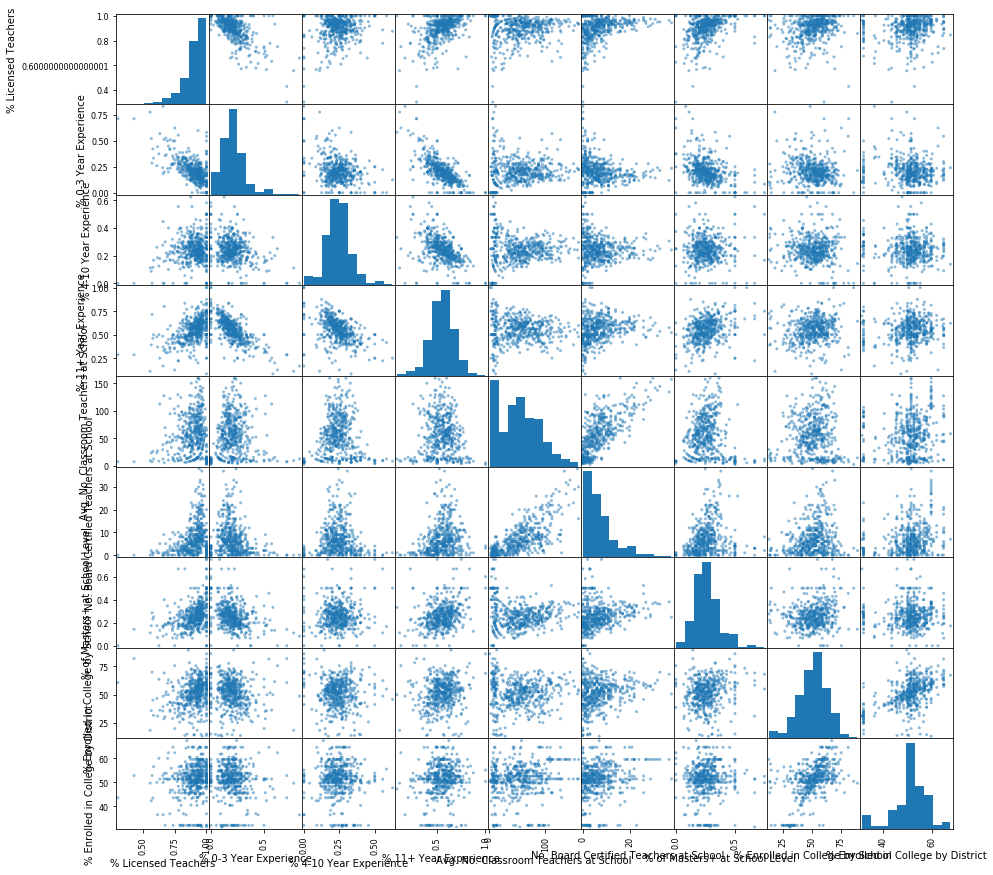

In [15]:
corrColumnNames = [ '% Licensed Teachers',
                    '% 0-3 Year Experience',
                    '% 4-10 Year Experience',
                    '% 11+ Year Experience',
                    'Avg. No. Classroom Teachers at School',
                    'No. Board Certified Teachers at School',
                    '% of Masters+ at School Level',
                    '% Enrolled in College by School',
                    '% Enrolled in College by District']

ax = scatter_matrix(dfMergedSet[corrColumnNames], figsize=(15, 15))
plt.show()

In [16]:
dfMergedSet[corrColumnNames].corr('pearson')

,% Licensed Teachers,% 0-3 Year Experience,% 4-10 Year Experience,% 11+ Year Experience,Avg. No. Classroom Teachers at School,No. Board Certified Teachers at School,% of Masters+ at School Level,% Enrolled in College by School,% Enrolled in College by District
% Licensed Teachers,1.000000,-0.645872,0.192618,0.462725,0.039419,0.291137,0.386627,0.215344,0.146896
% 0-3 Year Experience,-0.645872,1.000000,-0.297572,-0.716992,0.027853,-0.199418,-0.376755,-0.094840,-0.115229
% 4-10 Year Experience,0.192618,-0.297572,1.000000,-0.452138,-0.000115,-0.042173,0.043827,-0.082986,-0.014867
% 11+ Year Experience,0.462725,-0.716992,-0.452138,1.000000,-0.025915,0.217028,0.319995,0.149332,0.118379
Avg. No. Classroom Teachers at School,0.039419,0.027853,-0.000115,-0.025915,1.000000,0.726350,-0.058027,0.023321,0.132110
No. Board Certified Teachers at School,0.291137,-0.199418,-0.042173,0.217028,0.726350,1.000000,0.181671,0.188221,0.219924
% of Masters+ at School Level,0.386627,-0.376755,0.043827,0.319995,-0.058027,0.181671,1.000000,0.139220,0.023420
% Enrolled in College by School,0.215344,-0.094840,-0.082986,0.149332,0.023321,0.188221,0.139220,1.000000,0.501103
% Enrolled in College by District,0.146896,-0.115229,-0.014867,0.118379,0.132110,0.219924,0.023420,0.501103,1.000000


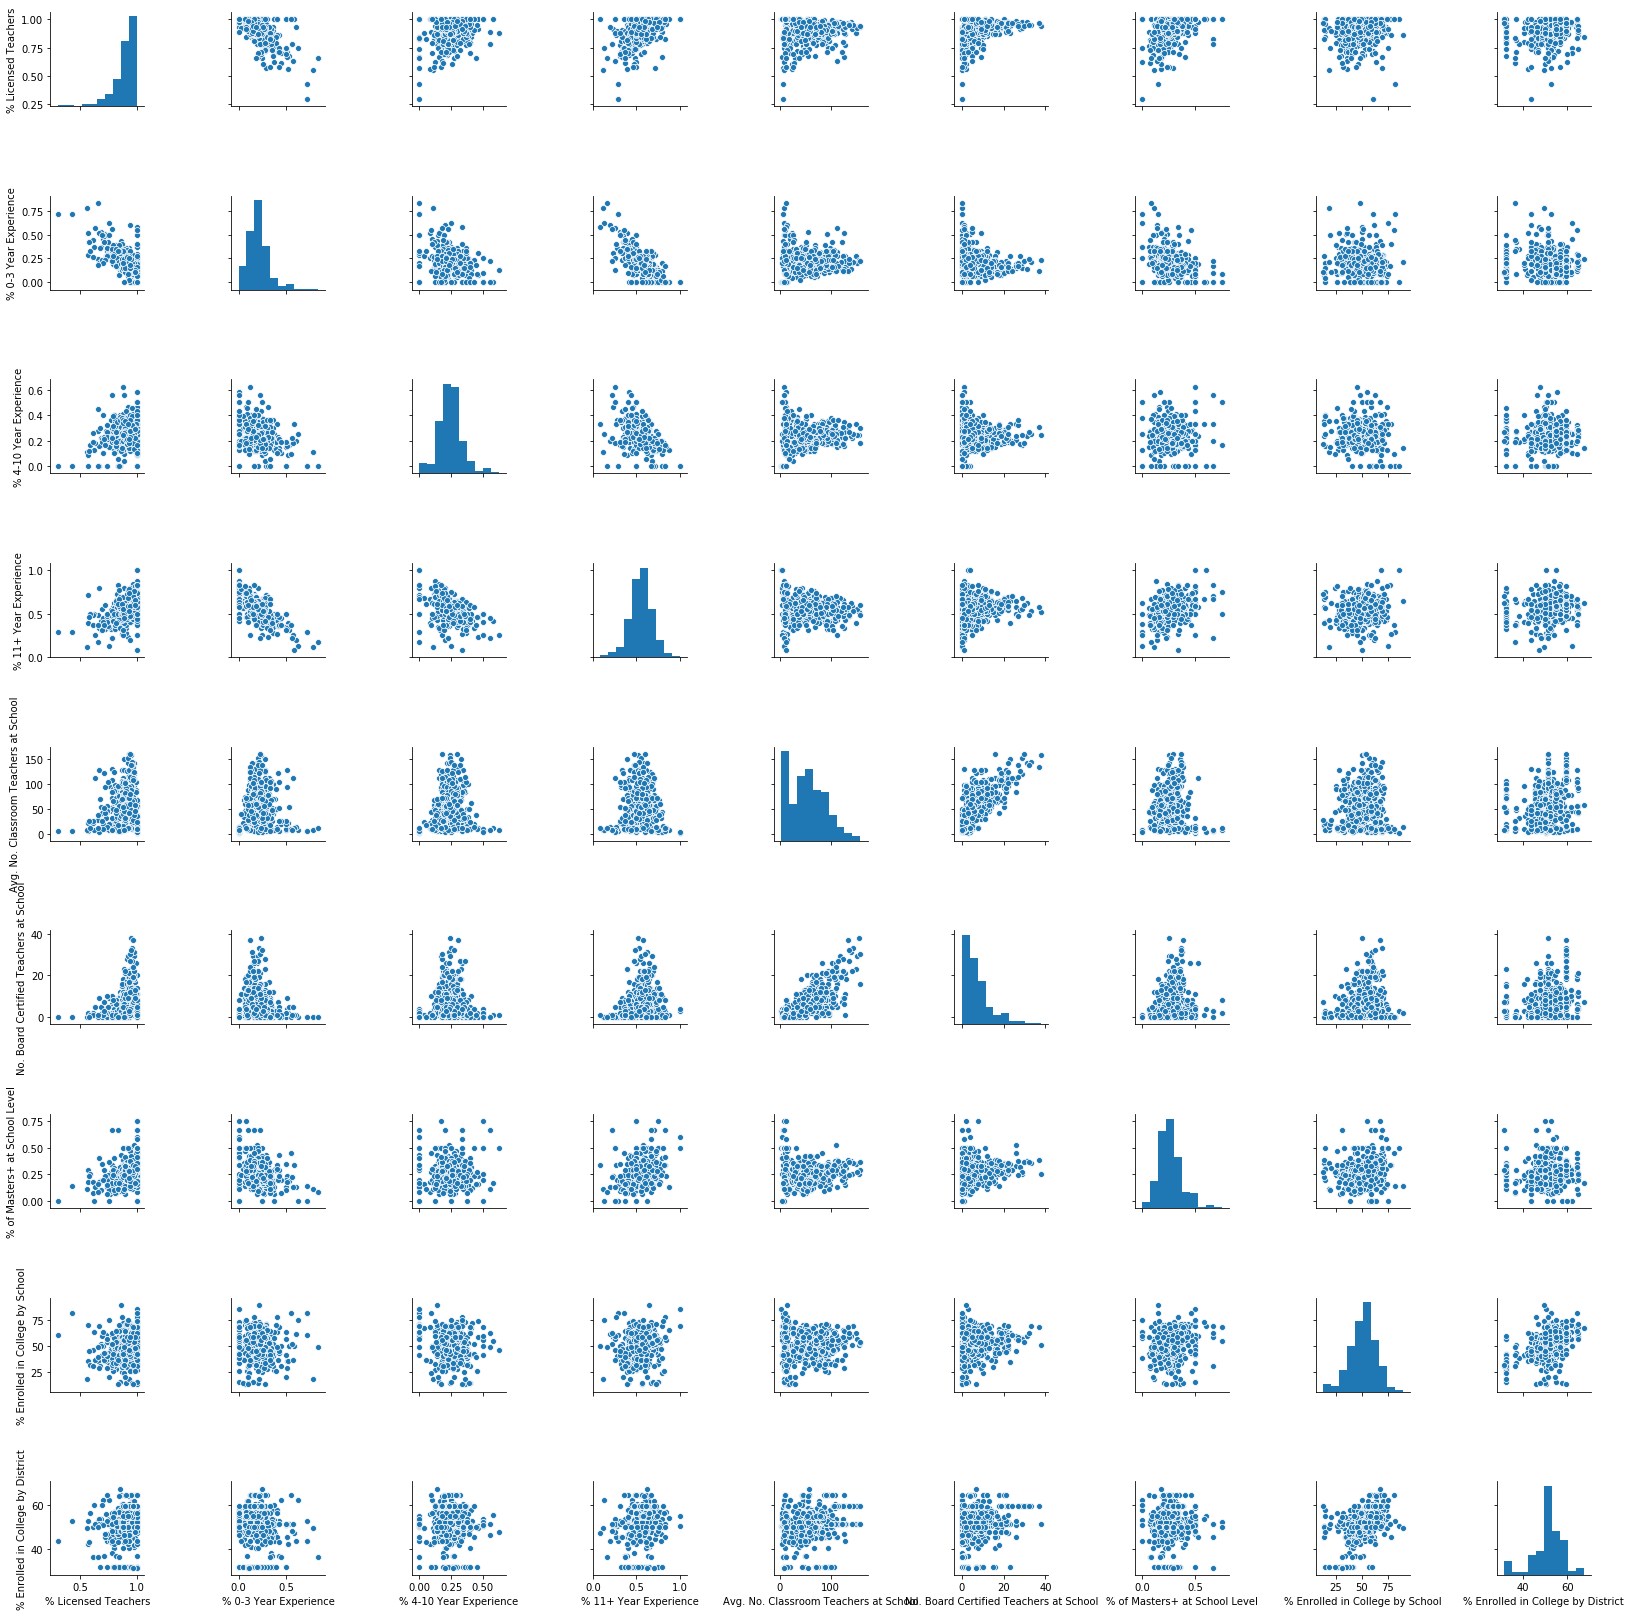

In [17]:
sns.pairplot(dfMergedSet[corrColumnNames])

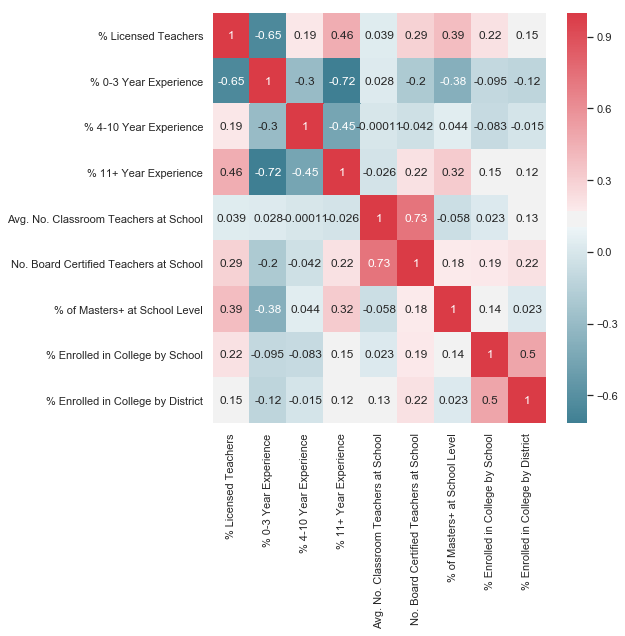

In [18]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(dfMergedSet[corrColumnNames].corr(), cmap=cmap, annot=True)

f.tight_layout()

### New Features
Are there other features that could be added to the data or created from existing features. Which ones?

### Exceptional Work
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.